In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Random Stock Price
2. NetLogo examples

# 1. Random Stock Price

In [2]:
np.random.rand()
np.random.choice([-1,1])

-1

In [3]:
def generate_random_walk(start=260, steps=100, random_state=1, mult=1):
    random = np.random.RandomState(random_state)
    price = [start]
    for i in range(steps):
        add = random.rand()
        sign = random.choice([-1,1])
        new_price = price[i] + add * sign * mult
        price.append(new_price)
    return price        

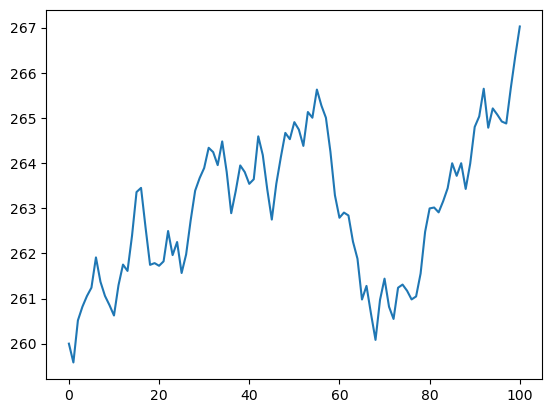

In [4]:
price = generate_random_walk()
plt.plot(price);

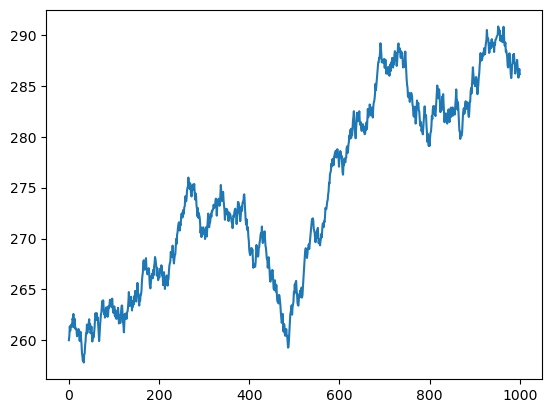

In [5]:
price = generate_random_walk(steps=1000, random_state=2)
plt.plot(price);

In [6]:
prices = []
for i in range(20):
    price = generate_random_walk(steps=1000, random_state=i)
    prices.append(price)

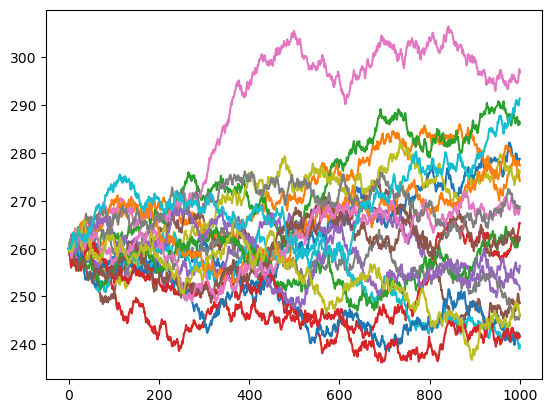

In [7]:
for p in prices:
    plt.plot(p);

In [8]:
from tqdm import tqdm

In [9]:
prices = []
for i in tqdm(range(3000)):
    price = generate_random_walk(steps=200, random_state=i)
    prices.append(price)
prices = np.array(prices)

100%|█████████████████| 3000/3000 [00:08<00:00, 359.06it/s]


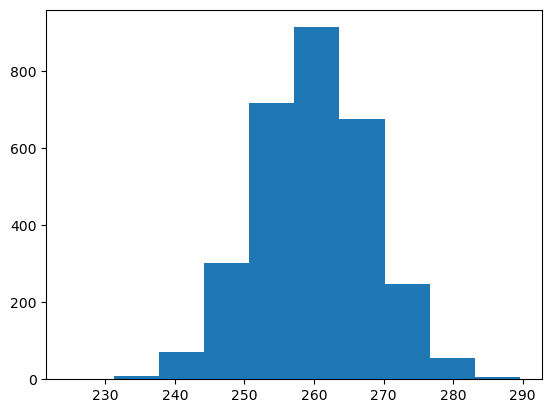

In [10]:
plt.hist(prices[:, -1]);

In [11]:
prices = []
for i in range(20):
    price = generate_random_walk(steps=10000, random_state=i)
    prices.append(price)

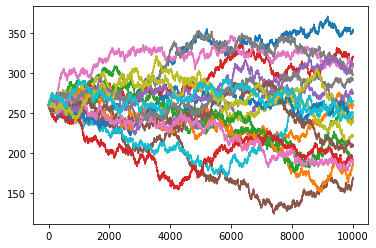

In [12]:
for p in prices:
    plt.plot(p);

In [13]:
prices = []
for i in tqdm(range(3000)):
    price = generate_random_walk(steps=1000, random_state=i)
    prices.append(price)
prices = np.array(prices)

100%|██████████| 3000/3000 [00:55<00:00, 54.36it/s]


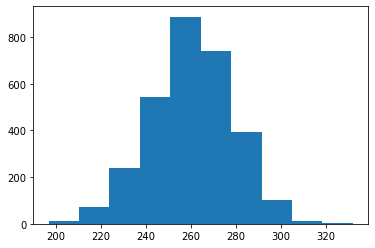

In [14]:
plt.hist(prices[:, -1]);

# Compare with some stock market prices

In [11]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 8.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


[*********************100%***********************]  1 of 1 completed


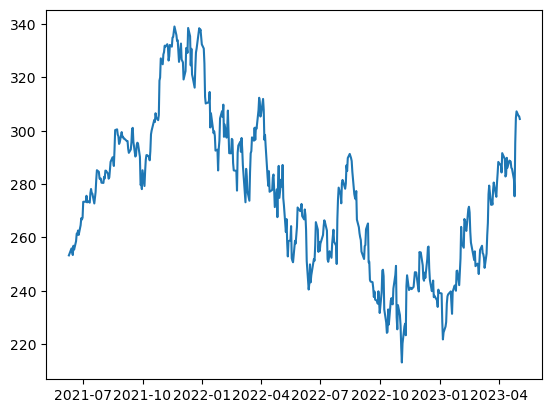

In [15]:
import yfinance as yf 

data = yf.download('MSFT', '2021-06-10', '2023-05-04')  # Microsoft

plt.plot(data['Adj Close'])

In [16]:
data['Adj Close'].head(3)

Date
2021-06-10    253.266159
2021-06-11    253.906143
2021-06-14    255.875214
Name: Adj Close, dtype: float64

In [25]:
prices = []
for i in range(100):
    price = generate_random_walk(start= 251.536057, steps=500, random_state=i, mult)
    prices.append(price)

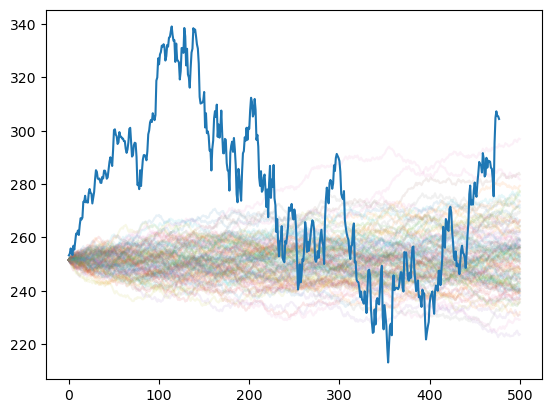

In [26]:
for p in prices:
    plt.plot(p, alpha=0.1);
plt.plot(data['Adj Close'].values)

In [35]:
prices = []
for i in range(20):
    price = generate_random_walk(start= 251.536057, steps=477, random_state=i, mult=5)
    prices.append(price)

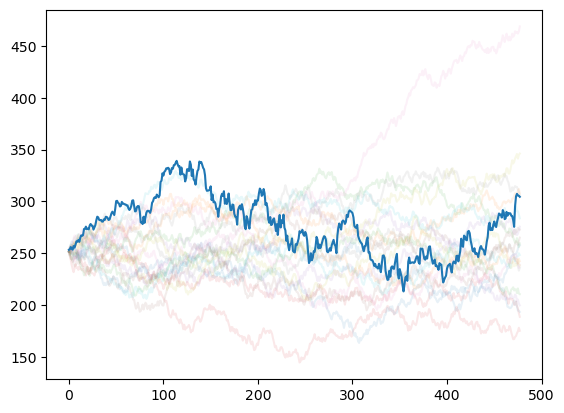

In [36]:
for p in prices:
    plt.plot(p, alpha=0.1);
plt.plot(data['Adj Close'].values);

In [37]:
from sklearn.metrics import mean_squared_error

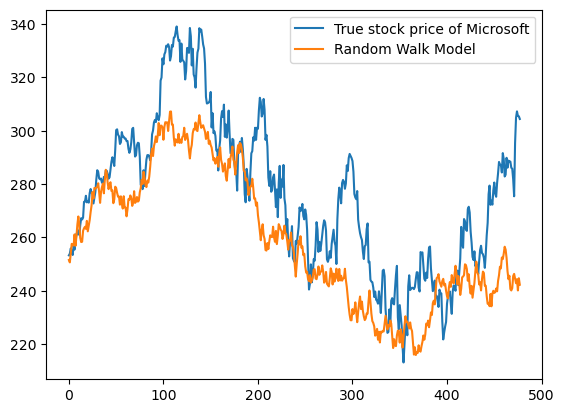

In [38]:
mse = []
for p in prices:
    mse.append(mean_squared_error(data['Adj Close'].values, p))
    
i = np.argmin(mse)    
plt.plot(data['Adj Close'].values, label='True stock price of Microsoft')
plt.plot(prices[i], label='Random Walk Model')
plt.legend();

# 2. NetLogo examples

- Forest Fire http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Earth%20Science/Fire.nlogo

- Bank Reserves http://www.netlogoweb.org/launch#http://ccl.northwestern.edu/netlogo/models/models/Sample%20Models/Social%20Science/Economics/Unverified/Bank%20Reserves.nlogo